# Tarea Módulo VIII: Análisis de redes
Para el desarrollo de la tarea se seleccionó la red "20.net"  
La red está conformada por 500 nodos correspondientes a los principales aeropuertos de USA en el año 2002. Los pesos de las aristas reflejan la cantidad de asientos de todos los vuelos entre destinos en el año 2002.

In [74]:
import networkx as nx 
from networkx.algorithms.community import label_propagation_communities
import networkx.algorithms.community as nx_comm
import community as community_louvain
import networkx.algorithms.distance_measures as nx_dist
import networkx.algorithms.approximation as nx_aprox
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

## Cargar set de datos

In [ ]:
from google.colab import files 
files.upload()

Saving airports.net to airports.net


{'airports.net': b'in_node out_node weight\r\n1 111 68150\r\n1 49 110902\r\n1 283 72020\r\n1 177 220192\r\n1 72 164951\r\n1 56 22700\r\n1 48 325839\r\n1 137 171783\r\n1 152 34400\r\n1 51 441099\r\n1 68 474438\r\n1 156 115098\r\n1 41 514446\r\n1 20 913102\r\n1 303 55500\r\n1 123 190185\r\n1 62 372300\r\n1 22 886030\r\n1 101 279330\r\n1 119 247564\r\n1 139 175425\r\n1 158 43267\r\n1 90 367113\r\n1 38 336769\r\n1 12 659832\r\n1 47 358062\r\n1 82 129111\r\n1 121 36375\r\n1 129 83085\r\n1 207 139524\r\n1 18 503145\r\n1 173 262594\r\n1 46 53900\r\n1 79 426824\r\n1 26 723262\r\n1 6 809574\r\n1 3 1510808\r\n1 236 117606\r\n1 86 54400\r\n1 8 732851\r\n1 182 19440\r\n1 64 101916\r\n1 150 72523\r\n1 17 1107213\r\n1 144 12810\r\n1 184 112068\r\n1 31 1195101\r\n1 226 52110\r\n1 127 163399\r\n1 128 59720\r\n1 203 144231\r\n1 134 224027\r\n1 85 67375\r\n1 77 547157\r\n1 88 321661\r\n1 224 71557\r\n1 39 502806\r\n1 96 54400\r\n1 107 300258\r\n1 240 48500\r\n1 28 1033195\r\n1 11 652386\r\n1 92 138079\r

In [ ]:
df_net = pd.read_csv('airports.net', delimiter=' ')

## Datos Básicos

In [ ]:
G = nx.Graph()

In [ ]:
edges = []
for index, row in df_net.iterrows():
    edges.append((row['in_node'], row['out_node'], {'weight' : row['weight']}))
G.add_edges_from(edges)

In [ ]:
print('Cantidad de nodos: {}, Cantidad de aristas: {}'.format(G.number_of_nodes(),G.number_of_edges()))

Cantidad de nodos: 500, Cantidad de aristas: 2980


#### Check si es simplificada:

In [ ]:
G2 = nx.Graph()
for u,v,data in G.edges(data=True):
    if not G2.has_edge(u,v):
        G2.add_edge(u, v)

In [ ]:
print('Cantidad de nodos: {}, Cantidad de aristas: {}'.format(G2.number_of_nodes(),G2.number_of_edges()))

Cantidad de nodos: 500, Cantidad de aristas: 2980


Cantidad de nodos:	500  
Cantidad de aristas:	5960  
Etiquetas:	No hay etiquetas asociadas  
Pesos:	corresponde a la cantidad de asientos en los vuelos entre nodos para el año 2002  


## Dibujo

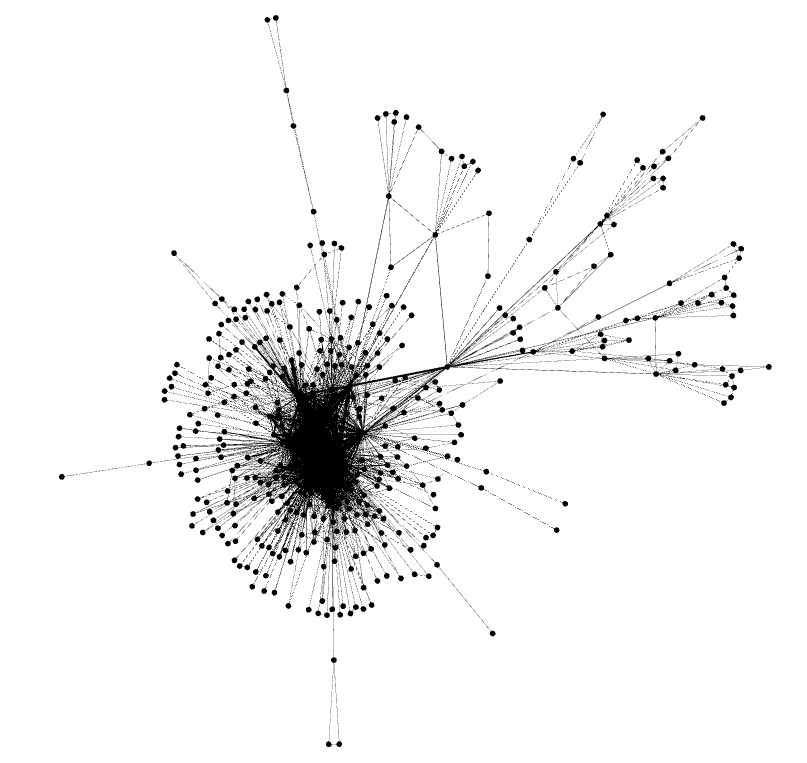

Algoritmo usado: Yifan Hu.

## Conexidad de la red

In [ ]:
gigante = max(nx.connected_components(G2), key=len)
print('Cantidad de nodos componente gigante: {}'.format(len(gigante)))

Cantidad de nodos componente gigante: 500


La cantidad de nodos de la componente gigante es la misma que la cantidad inicial.  
Es por esto que podemos decir que existe una sola componente conexa en la red, comprendida por la totalidad del gráfico.  
De igual manera, la componente gigante comprende la totalidad de la red.

In [ ]:
G3 = G2.subgraph(max(nx.connected_components(G2), key=len)).copy()

## Grados

In [ ]:
node_lst = []
deg_lst = []
for deg in G3.degree:
    node_lst.append(deg[0])
    deg_lst.append(deg[1])
print('Grado Mínimo: {}'.format(min(deg_lst)))
print('Grado Máximo: {}'.format(max(deg_lst)))
print('Grado Medio: {}'.format(sum(deg_lst)/len(deg_lst)))

Grado Mínimo: 1
Grado Máximo: 145
Grado Medio: 11.92


In [ ]:
fig = px.histogram(x=deg_lst, labels={'x':'Grado'}, nbins=500)
fig.update_layout(title='Distribución de Grados')
fig.show()

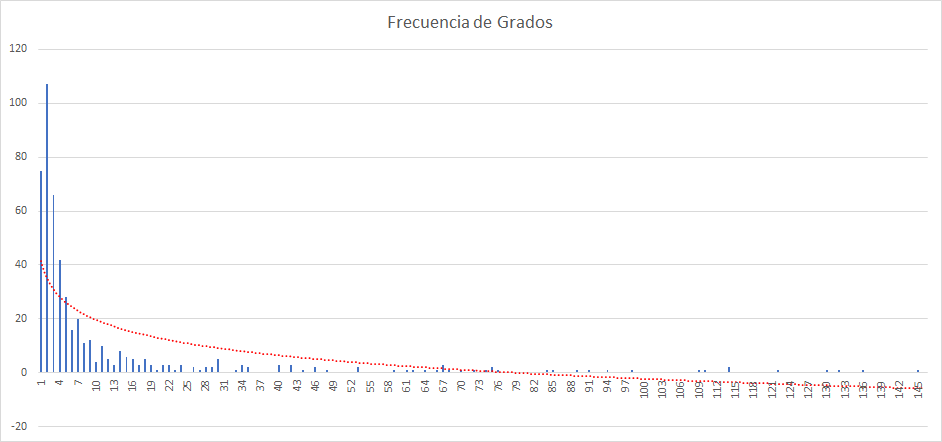

Se observa que sus grados se distribuyen de acuerdo a una función logarítmica. Sin embargo es posible que la muestra de nodos sea muy pequeña para apreciar que realmente nos encontramos ante una distribución según ley de potencia.

## Distancias

In [ ]:
print('Diametro: {}'.format(nx_dist.diameter(G3)))
print('Radio: {}'.format(nx_dist.radius(G3)))
print('Distancia promedio {}'.format(nx.average_shortest_path_length(G3)))

Diametro: 7
Radio: 4
Distancia promedio 2.9910300601202406


Una de las características del efecto Small World en una red es que su  distancia promedio debe ser del orden de logN. En este caso:

> log500 = 2.698

Con lo cual se cumple este requisito. Sin embargo antes de justificar el efecto Small World debemos revisar la transitividad de la red.

### Transitividad

In [118]:
#Según Python:
nx.algorithms.cluster.average_clustering(G3)

0.6174892374001623

Según Gephi:  
Coeficiente de clustering: 0.726 (promedio de los coeficientes de clustering de cada nodo).

De acuerdo a ambos resultados, la red presenta una alta transitividad, dado que su coeficiente de clustering promedio es significantemente mayor que el que puede ofrecer un grafo aleatorio construido con el mismo conjunto de nodos.

Esto finalmente nos confirma que la red presenta el efecto Small World (distancia promedio del orden de logN y alta transitividad).

## Centralidades

In [ ]:
bt_dict = nx.betweenness_centrality(G3, normalized=False)
pr_dict = nx.pagerank(G3)
cc_dict = nx.closeness_centrality(G3)
node_lst = []
bt_lst = []
pr_lst = []
cc_lst = []
for key in bt_dict.keys():
    node_lst.append(key)
    bt_lst.append((bt_dict[key]))
    pr_lst.append((pr_dict[key]))
    cc_lst.append((cc_dict[key]))

In [ ]:
df = pd.DataFrame(list(zip(node_lst, deg_lst, bt_lst, pr_lst, cc_lst)), 
               columns =['Nodos', 'Grado', 'Intermediacion', 'PageRank','Cercania']) 
df.sort_values(by='Nodos')

,Nodos,Grado,Intermediacion,PageRank,Cercania
0,1,145,11227.997891,0.019218,0.526927
100,2,136,7414.878903,0.017242,0.524711
37,3,132,11717.797750,0.019255,0.521967
72,4,76,4996.840881,0.010853,0.492596
108,5,91,4214.166900,0.012246,0.475238
...,...,...,...,...,...
497,496,2,0.000000,0.001349,0.195917
483,497,3,0.500000,0.001479,0.247275
484,498,2,0.000000,0.001062,0.247152
150,499,2,0.000000,0.000768,0.300965


El valor de PageRank se encuentra normalizado (entre 0 y 1).  
A continuación se normalizan los valores de cercanía, grado e intermediación.


In [ ]:
df['Cercania_norm'] = df['Cercania']/df['Cercania'].sum()
df['Grado_norm'] = df['Grado']/df['Grado'].sum()
df['Interm_norm'] = df['Intermediacion']/df['Intermediacion'].sum()
df.sort_values(by='Nodos')

,Nodos,Grado,Intermediacion,PageRank,Cercania,Cercania_norm,Grado_norm,Interm_norm
0,1,145,11227.997891,0.019218,0.526927,0.003057,0.024329,0.045205
100,2,136,7414.878903,0.017242,0.524711,0.003044,0.022819,0.029853
37,3,132,11717.797750,0.019255,0.521967,0.003028,0.022148,0.047177
72,4,76,4996.840881,0.010853,0.492596,0.002857,0.012752,0.020118
108,5,91,4214.166900,0.012246,0.475238,0.002757,0.015268,0.016967
...,...,...,...,...,...,...,...,...
497,496,2,0.000000,0.001349,0.195917,0.001136,0.000336,0.000000
483,497,3,0.500000,0.001479,0.247275,0.001434,0.000503,0.000002
484,498,2,0.000000,0.001062,0.247152,0.001434,0.000336,0.000000
150,499,2,0.000000,0.000768,0.300965,0.001746,0.000336,0.000000


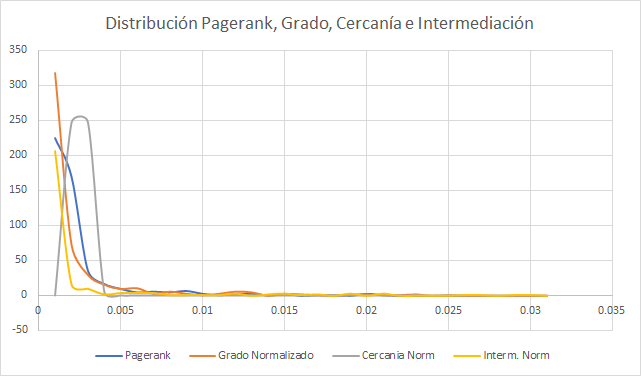

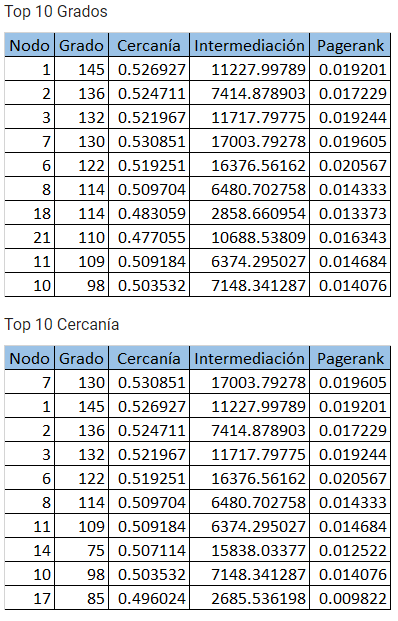

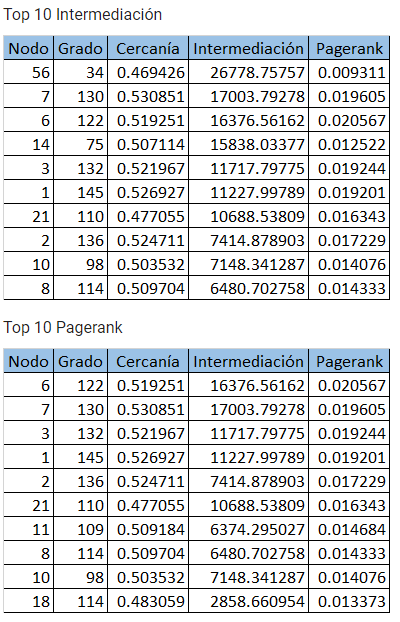

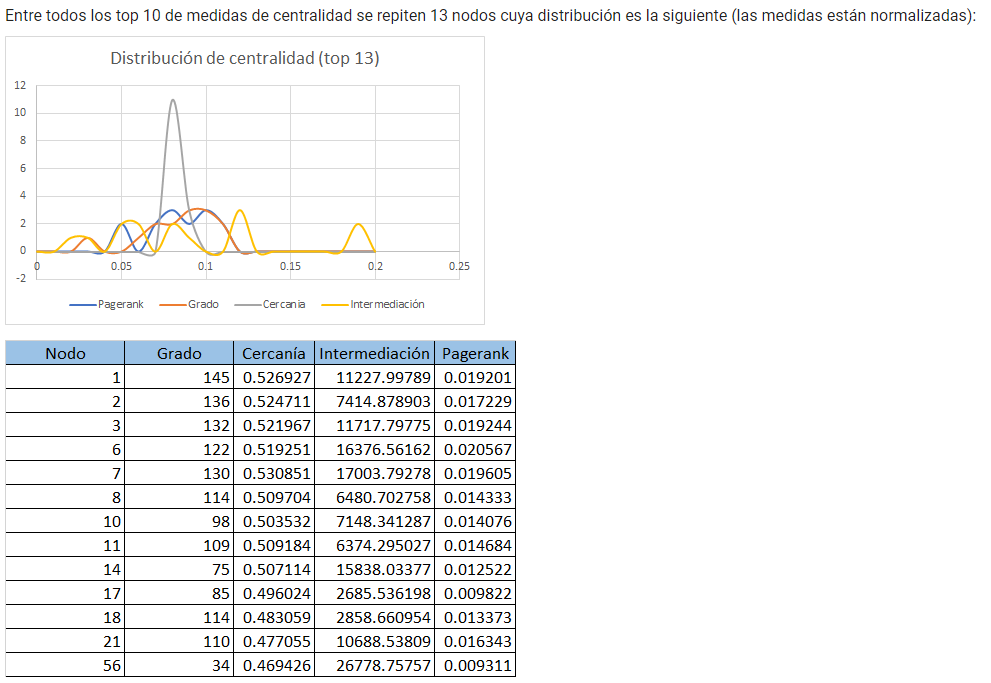

### Cercanía Visual

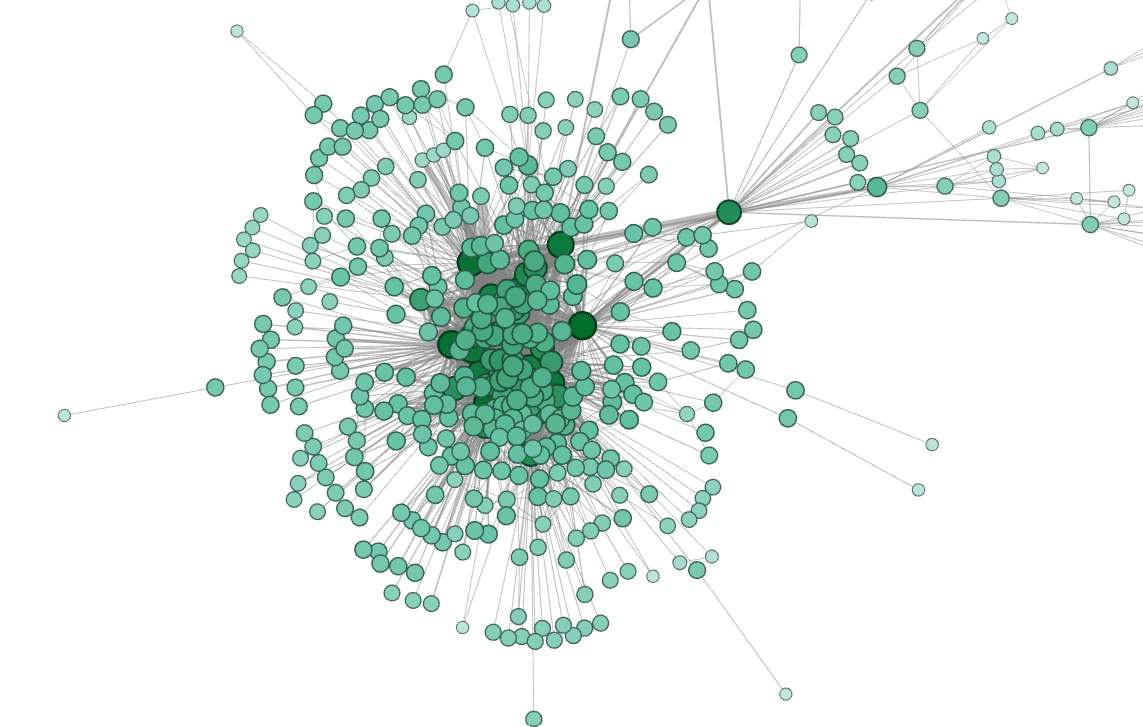

### Intermediación Visual
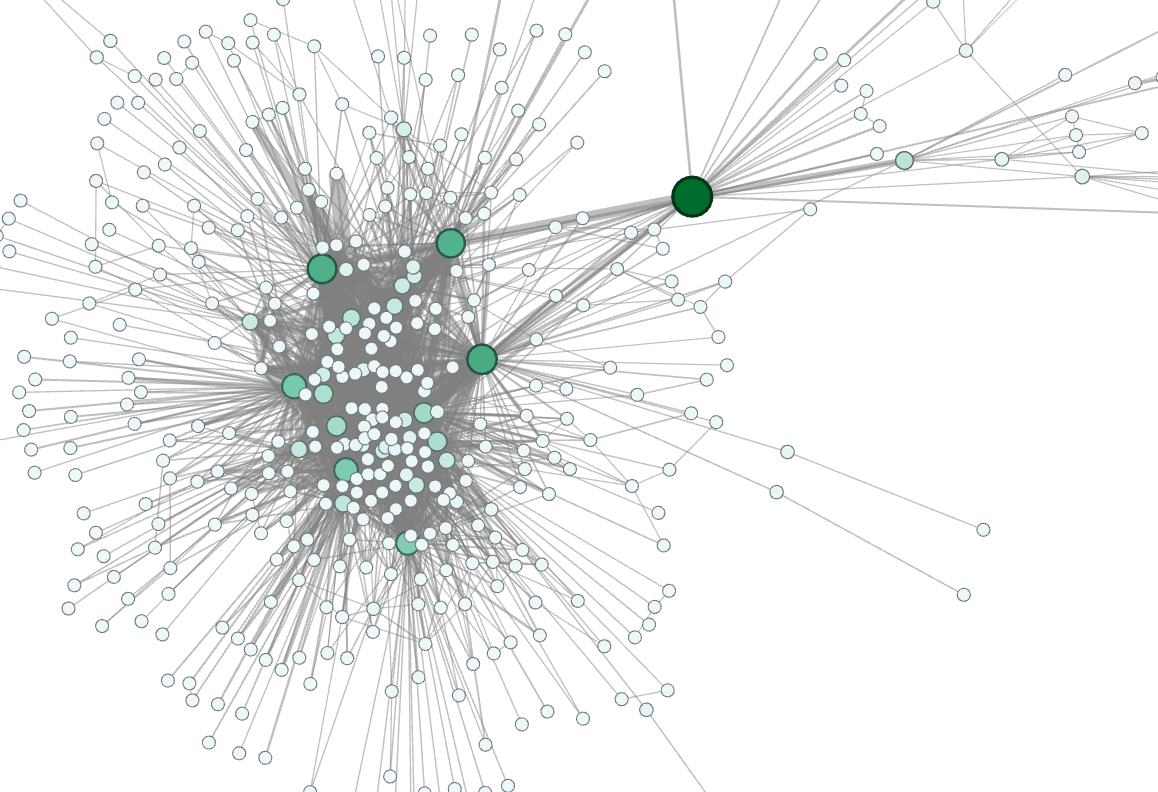

### Grado Visual
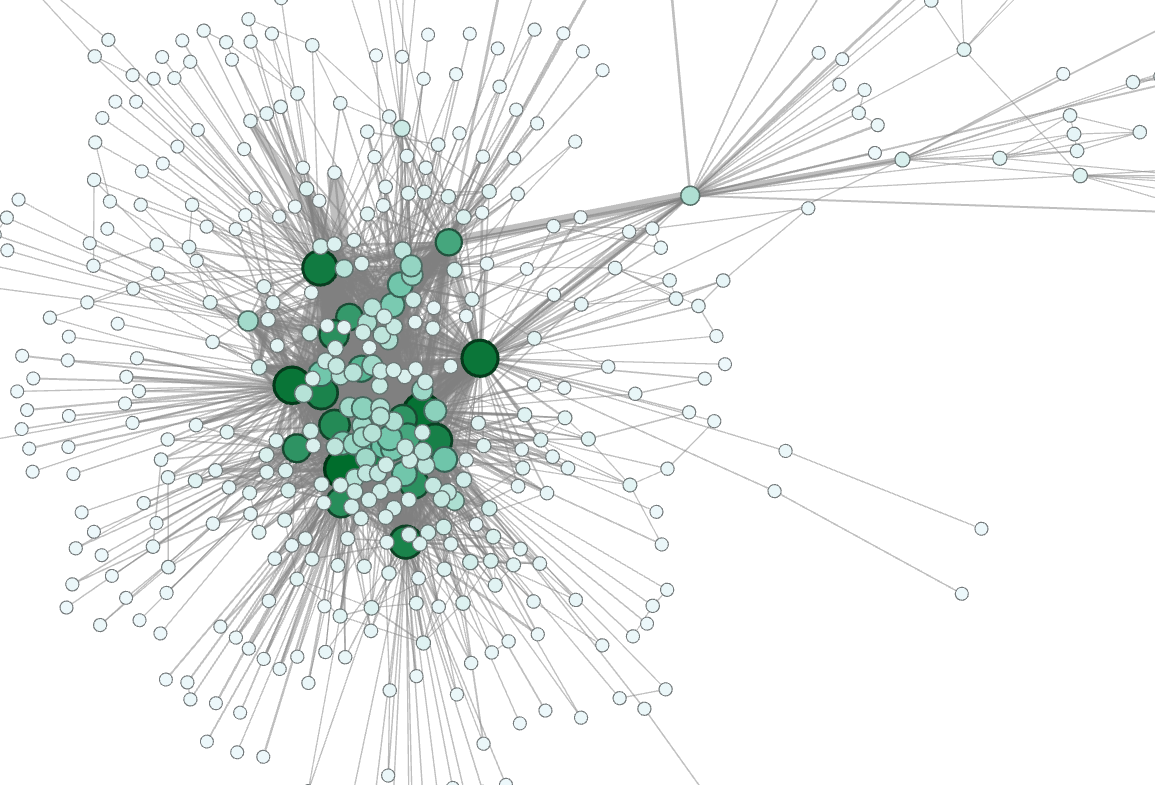

### PageRank Visual
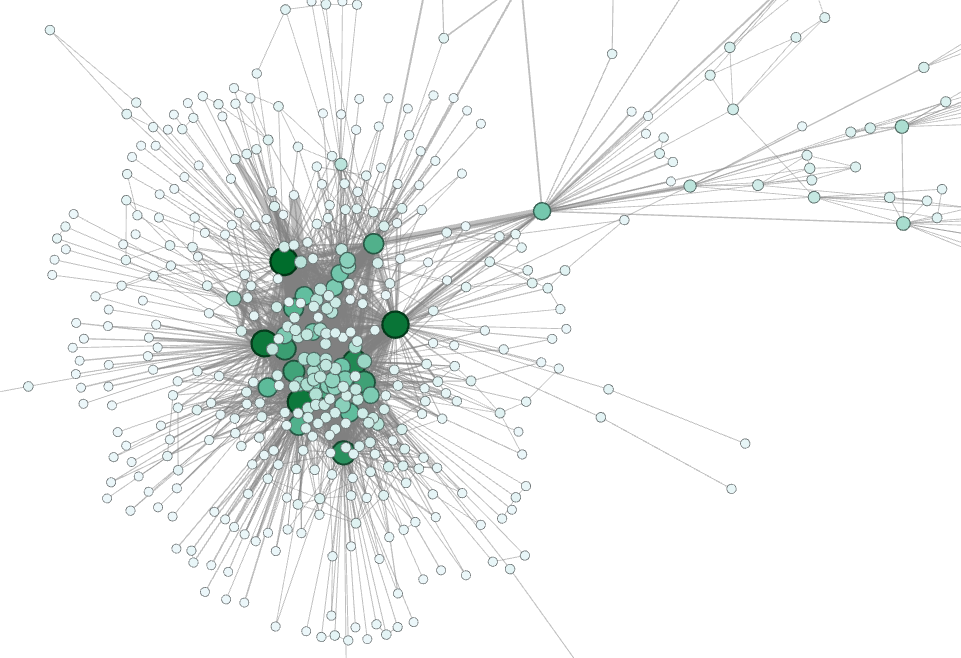

Mientras más oscuro y grande el nodo, mayor es el valor de la medida de centralidad evaluada

## Nucleo/Periferia

In [72]:
n_node_lst = []
k_lst = []
node_vis = []
edge_vis = []
for k in range(1,31):
    k_lst.append(k)
    n_node_lst.append(len(nx.k_core(G3,k)))
    node_vis.append(len(nx.k_core(G3,k).nodes)/len(G3.nodes)*100)
    edge_vis.append(len(nx.k_core(G3,k).edges)/len(G3.edges)*100)
fig1 = px.scatter(x=k_lst, y=n_node_lst, labels={'x':'K-core', 'y':'Nodos'})
fig1.update_layout(title='Nodos por K-core')
fig2 = px.scatter(x=k_lst, y=node_vis, labels={'x':'K-core', 'y':'Visualización de Nodos [%]'})
fig2.update_layout(title='Visualización de nodos por K-core')
fig3 = px.scatter(x=k_lst, y=edge_vis, labels={'x':'K-core', 'y':'Visualización de Aristas [%]'})
fig3.update_layout(title='Visualización de aristas por K-core')
fig1.show()
fig2.show()
fig3.show()

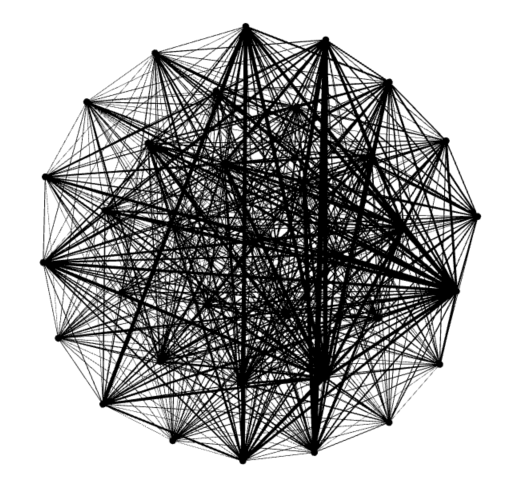

Grafo del subconjunto 29-core de la red, usando algoritmo de distribución Fuchterman Reingold.

La profundidad de la red es 29.  
En el **29-core** existen 35 nodos (7% de la red) concentrando 1138 aristas (19% de la red).  
Para el caso particular que estamos analizando, estos indicadores implican que el 7% de los aeropuertos más centralizados, concentran el 19% de las rutas directas.  

## Comunidades

In [130]:
partition = community_louvain.best_partition(G3)
comunity_lst = []
node_lst = []
for key in partition.keys():
  comunity_lst.append(partition[key])
  node_lst.append(key)
df_com = pd.DataFrame(list(zip(comunity_lst, node_lst)), 
               columns =['comunidad', 'nodo'])
df_com.groupby(['comunidad']).count()

,nodo
comunidad,
0,161
1,146
2,67
3,48
4,40
5,2
6,17
7,3
8,2


In [131]:
c = list(label_propagation_communities(G3))
nx_comm.modularity(G3,c)

0.11372601459393733

Los resultados que se muestran arriba son generados con Python.  
El análisis posterior fue realizado con Gephi, por lo que no conversan los datos.

Número de comunidades: 17  
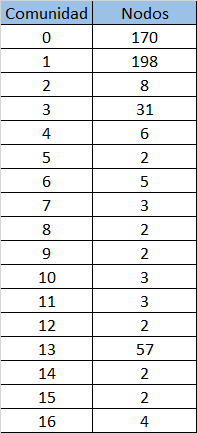

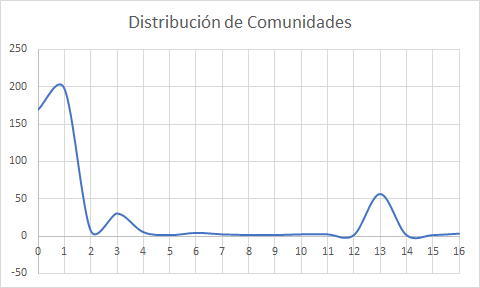

### Comunidad Visual
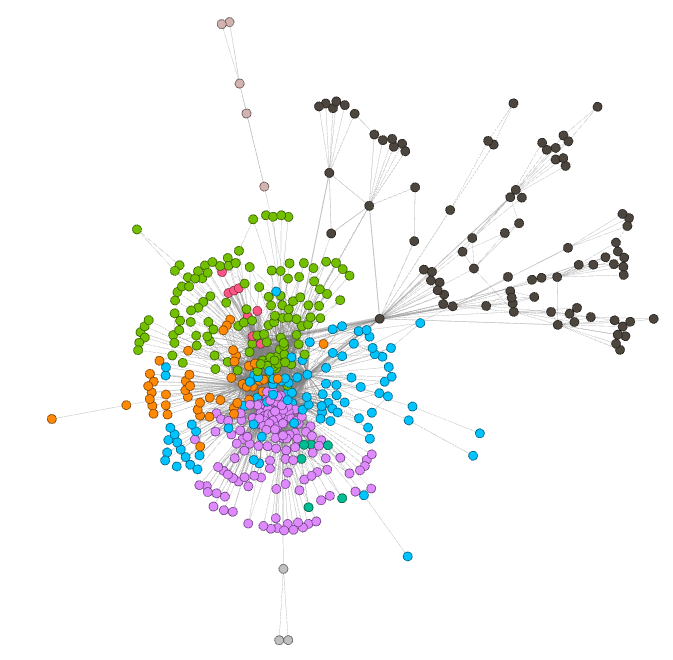

Los resultados consideran un factor aleatorio, es por esto que los resultados son similares pero no replicables.  
Se puede apreciar que la interacción entre las comunidades se realiza a través de unos pocos nodos. Esto en la práctica quiere decir que para ir desde una zona a otra dentro de EEUU debemos hacer escala en los aeropuertos principales (nodos hub) de cada zona. Y eso tiene mucho sentido para cualquier aerolinea que quiere maximizar sus ingresos.


## Asortatividad

In [96]:
# Calculo el coeficiente de correlación de Pearson
nx.degree_pearson_correlation_coefﬁcient(G3)

-0.26786294344853956

De acuerdo al valor del coeficiente de correlación.  
El valor negativo implica que existe relación entre nodos de distinto grado.  
El valor se ubica cercano a 0, por lo que se podría hablar de un caso de red no asortativa.

## Modelo Estructural

In [101]:
def profundidad(G):
  for k in range(1,len(G.nodes())):
      prof = len(nx.k_core(G,k))
      if prof == 0:
        return k-1

Definimos una función que determina la profundidad de la red.  
Devuelve el valor de K, previo a que la cantidad de nodos sea 0.

In [124]:
n_modelo = []
modularity_lst = []
correlation_lst = []
clustering_lst = []
prof_k = []
for n in range(10):
    n_modelo.append(n)
    #Genero otra red, con la misma distribución de grados
    GI = nx.configuration_model([d for v, d in G3.degree()])
    GX = nx.Graph()
    for u,v,data in GI.edges(data=True):
        if not GX.has_edge(u,v):
            GX.add_edge(u, v)
    GX.remove_edges_from(nx.selfloop_edges(GX))
    # Particiono en comunidades y evalúo, para esa nueva red
    cx = list(label_propagation_communities(GX))
    modularity_lst.append(nx_comm.modularity(GX,cx))
    correlation_lst.append(nx.degree_pearson_correlation_coefﬁcient(GX))
    clustering_lst.append(nx.algorithms.cluster.average_clustering(GX))
    prof_k.append(profundidad(GX))

df_mod = pd.DataFrame(list(zip(n_modelo, modularity_lst, correlation_lst, clustering_lst, prof_k)), 
               columns =['n_modelo', 'modularity', 'correlation', 'clustering', 'profundidad'])

df_mod

,n_modelo,modularity,correlation,clustering,profundidad
0,0,0.011251,-0.142016,0.223415,17
1,1,0.004839,-0.124527,0.220583,18
2,2,0.003203,-0.144979,0.231693,17
3,3,0.007241,-0.116725,0.216582,17
4,4,0.002411,-0.124128,0.229504,16
5,5,0.005621,-0.129365,0.219253,18
6,6,0.008054,-0.118764,0.217258,17
7,7,0.007283,-0.144743,0.207399,16
8,8,0.007248,-0.133046,0.229874,17
9,9,0.008045,-0.137349,0.225160,17


Para nuestra red original los valores son:  
Modularidad: 0.1137  
Correlación: -0.2678  
Clustering: 0.6174  
Profundidad: 29
  
En relación a las redes aleatorias:  
- Hay una transitividad baja
- Se respeta que las redes son no asortativas
- Se aprecia una menor profundidad
- Una menor modularidad implica que las conexiones entre nodos dentro de una comunidad son débiles y entre comunidades son fuertes. Esto quiere decir que la red no es muy separable en comunidades.